#### Overdose factors Analysis 
In this notebook I will start to bring together the dataframes I've organized in the cleanign notebooks in order to find patterns and relationships between the data.

### Isolation Factors 

In [22]:
import pandas as pd 
import numpy as np
import seaborn as sns

#### Did states with longer or more severe lock down orders see higher rates of fatal overdoses than states with shorter/more lenient lockdowns?
###### Steps to follow:
* "score" lockdowns based on duration/severity 
* merge score with overdose analysis dataframe 
* look for correlations between high/low scoring states and states that saw a greater/lower than expected overdose rate ("expected" inferred from 4yr average 2015-2019) 
* look for timeline correlations - do states see an increase immediately following stay at home order?

In [23]:
iso_df = pd.read_csv('../data/data_clean/isolation_factors.csv')
od_analysis = pd.read_csv('../data/data_clean/od_analysis_bystate.csv')
drug_cov = pd.read_csv('../data/data_clean/change_OD_2019_to_2020.csv')
dict_pol = pd.read_csv('../data/data_clean/covid_policy_dictionary.csv')

In [24]:
iso_df = iso_df.fillna(0)
iso_df

,STATE,POSTCODE,STAYHOME,STAYHOMENOGP,END_STHM,CLBSNS,END_BSNS,CLSCHOOL,CLREST,ENDREST,...,CLDAYCR,OPNCLDCR,CLNURSHM,sthm_duration,clbsns_duration,clrest_duruation,clgym_duration,clmov_duration,clbar_duration,clchildcare_duration
0,Alabama,AL,2020-04-04,0,2020-04-30,2020-03-28,2020-04-30,2020-03-20,2020-03-19,2020-05-11,...,2020-03-20,2020-05-23,2020-03-19,26.0,33.0,53.0,44.0,55.0,53.0,64.0
1,Alaska,AK,2020-03-28,0,2020-04-24,2020-03-24,2020-04-24,2020-03-16,2020-03-18,2020-04-24,...,0,0,0,27.0,31.0,37.0,51.0,51.0,51.0,0.0
2,Arizona,AZ,2020-03-31,0,2020-05-16,2020-03-31,2020-05-08,2020-03-16,2020-03-21,2020-05-11,...,0,0,0,46.0,38.0,51.0,53.0,56.0,56.0,0.0
3,Arkansas,AR,0,0,0,2020-04-06,2020-05-04,2020-03-17,2020-03-20,2020-05-11,...,0,0,2020-03-13,0.0,28.0,52.0,45.0,59.0,60.0,0.0
4,California,CA,2020-03-19,0,0,2020-03-19,2020-05-08,2020-03-23,2020-03-16,2020-05-18,...,0,0,0,0.0,50.0,63.0,0.0,0.0,0.0,0.0
5,Colorado,CO,2020-03-26,0,2020-04-27,2020-03-19,2020-05-01,2020-03-23,2020-03-17,2020-05-27,...,0,0,2020-03-12,32.0,43.0,71.0,79.0,93.0,93.0,0.0
6,Connecticut,CT,0,2020-03-23,2020-05-20,2020-03-23,2020-05-20,2020-03-17,2020-03-16,2020-05-20,...,0,0,2020-03-09,0.0,58.0,65.0,93.0,93.0,0.0,0.0
7,Delaware,DE,2020-03-24,0,2020-06-01,2020-03-24,2020-05-08,2020-03-16,2020-03-16,2020-06-01,...,2020-04-06,2020-06-15,0,69.0,45.0,77.0,74.0,74.0,91.0,70.0
8,Florida,FL,2020-04-03,0,2020-05-18,2020-04-03,2020-05-18,2020-03-17,2020-04-03,2020-05-18,...,0,0,2020-03-15,45.0,45.0,45.0,45.0,63.0,80.0,0.0
9,Georgia,GA,2020-04-03,0,2020-05-01,2020-04-03,2020-05-01,2020-03-18,2020-04-03,2020-04-27,...,0,0,2020-04-03,28.0,28.0,24.0,21.0,24.0,69.0,0.0


##### Column definitions:
"0" means policy was not implemented 

In [25]:
dict_pol.transpose()

,0
Unnamed: 0,0
STATE,State
POSTCODE,State Abbreviation
STAYHOME,Stay at home/ shelter in place
STAYHOMENOGP,Stay at home order' issued but did not specifi...
...,...
HMDLVOP,Home delivery of take-home medication by opioi...
TLHLCL24,Use of telemedicine for schedule II-V prescrip...
WVDEAREQ,Waive requirement to obtain separate DEA regis...
MH19,"Mental health professionals per 100,000 popula..."


I'm going to 'score' the severity of shut downs in each state. States with high scores will indicate (1) longest shutdowns or (2) most expansive, i.e. including gyms, theaters, retail,etc - the score will be the sum of the number of days each lockdown policy was in place. 

Presumably, states with the highest scores will be the ones in which people felt the most isolated as a result of the pandemic. States with low scores will be states that did not shut down at all or which had more lenient shut down restrictions. I hypothesize people will feel less isolated in these states, and accordingly, they will have a smaller increase or decrease in overdose rates relative to higher scoring states. I'll then compare the scores to the changes in overdose rates and see if there is a correlation 

In [26]:
shut_down_cols = ['STATE','POSTCODE','sthm_duration','clbsns_duration','clrest_duruation','clgym_duration','clmov_duration','clbar_duration','clchildcare_duration']
shut_down_df = iso_df[shut_down_cols]
shut_down_df

,STATE,POSTCODE,sthm_duration,clbsns_duration,clrest_duruation,clgym_duration,clmov_duration,clbar_duration,clchildcare_duration
0,Alabama,AL,26.0,33.0,53.0,44.0,55.0,53.0,64.0
1,Alaska,AK,27.0,31.0,37.0,51.0,51.0,51.0,0.0
2,Arizona,AZ,46.0,38.0,51.0,53.0,56.0,56.0,0.0
3,Arkansas,AR,0.0,28.0,52.0,45.0,59.0,60.0,0.0
4,California,CA,0.0,50.0,63.0,0.0,0.0,0.0,0.0
5,Colorado,CO,32.0,43.0,71.0,79.0,93.0,93.0,0.0
6,Connecticut,CT,0.0,58.0,65.0,93.0,93.0,0.0,0.0
7,Delaware,DE,69.0,45.0,77.0,74.0,74.0,91.0,70.0
8,Florida,FL,45.0,45.0,45.0,45.0,63.0,80.0,0.0
9,Georgia,GA,28.0,28.0,24.0,21.0,24.0,69.0,0.0


In [27]:
shut_down_cols= ['sthm_duration','clbsns_duration','clrest_duruation','clgym_duration','clmov_duration','clbar_duration','clchildcare_duration']
shut_down_df['score'] = shut_down_df[shut_down_cols].sum(axis = 1)
shut_down_df

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STATE,POSTCODE,sthm_duration,clbsns_duration,clrest_duruation,clgym_duration,clmov_duration,clbar_duration,clchildcare_duration,score
0,Alabama,AL,26.0,33.0,53.0,44.0,55.0,53.0,64.0,328.0
1,Alaska,AK,27.0,31.0,37.0,51.0,51.0,51.0,0.0,248.0
2,Arizona,AZ,46.0,38.0,51.0,53.0,56.0,56.0,0.0,300.0
3,Arkansas,AR,0.0,28.0,52.0,45.0,59.0,60.0,0.0,244.0
4,California,CA,0.0,50.0,63.0,0.0,0.0,0.0,0.0,113.0
5,Colorado,CO,32.0,43.0,71.0,79.0,93.0,93.0,0.0,411.0
6,Connecticut,CT,0.0,58.0,65.0,93.0,93.0,0.0,0.0,309.0
7,Delaware,DE,69.0,45.0,77.0,74.0,74.0,91.0,70.0,500.0
8,Florida,FL,45.0,45.0,45.0,45.0,63.0,80.0,0.0,323.0
9,Georgia,GA,28.0,28.0,24.0,21.0,24.0,69.0,0.0,194.0


In [28]:
cols_to_use = ['STATE','POSTCODE','score']
score_df = shut_down_df[cols_to_use]

In [29]:
od_analysis = od_analysis.rename(columns={'Unnamed: 0':'POSTCODE'})

Column meanings:
* 4yr ave - the average percentage of total deaths attributed to drug overdose in the years 2014-2019
* pre - the average percentage of total deaths attributed to drug overdose in the three months before COVID-19 (Dec 2019-Feb 2020) 
* post - the average percentage of total deaths attributed to drug overdose in the first three months of COVID-19 (Mar 2020-May 2020) 
* Covid Dif - the difference between the rate of deaths attributed to drug overdose pre-COVID and post-COVID 
    * 'Post'-'Pre' = 'Covid Dif'
* PostmAve - this column is to help determine if increases in overdose rates are attributable to COVID pandemic, or are part of the overall trend that shows the rate of overdose has been increasing every year. This columan is the difference between the post-Covid rate and the 4 year average rate 
    * 'Post'-'4yr Ave' = 'PostmAve'
* Greater - This indicates whether the Covid-dif is greater than the PostmAve dif; 'Yes' means there is a more significant change in percentages of deaths attributed to drugs in the 6 month period of the pandemic than one would expect given the average trends over the last 4 years  

In [31]:
iso_od_df = score_df.merge(od_analysis, on=['POSTCODE'],how='outer')
iso_od_df.set_index('STATE')

,POSTCODE,score,4yr Ave,Pre,Post,Covid Dif,PostmAve,Greater
STATE,,,,,,,,
Alabama,AL,328.0,1.430067,1.413655,1.518911,0.105255,0.088844,Yes
Alaska,AK,248.0,2.953915,2.877810,2.699426,-0.178384,-0.254489,Yes
Arizona,AZ,300.0,2.602414,3.299551,3.419098,0.119547,0.816683,No
Arkansas,AR,244.0,1.271143,1.132268,1.237544,0.105275,-0.033600,Yes
California,CA,113.0,1.924043,2.393395,2.509404,0.116009,0.585361,No
Colorado,CO,411.0,2.564488,2.771959,2.955853,0.183894,0.391365,No
Connecticut,CT,309.0,3.121673,3.917401,3.766373,-0.151027,0.644701,No
Delaware,DE,500.0,3.368141,4.663324,4.749549,0.086225,1.381408,No
Florida,FL,323.0,2.254693,2.678116,2.925471,0.247355,0.670778,No


In [37]:
ave = iso_od_df['Pre']+iso_od_df['Post']
iso_od_df['ave'] = ave/2
iso_od_df.round(decimals=2)

,STATE,POSTCODE,score,4yr Ave,Pre,Post,Covid Dif,PostmAve,Greater,ave
0,Alabama,AL,328.0,1.43,1.41,1.52,0.11,0.09,Yes,1.47
1,Alaska,AK,248.0,2.95,2.88,2.70,-0.18,-0.25,Yes,2.79
2,Arizona,AZ,300.0,2.60,3.30,3.42,0.12,0.82,No,3.36
3,Arkansas,AR,244.0,1.27,1.13,1.24,0.11,-0.03,Yes,1.18
4,California,CA,113.0,1.92,2.39,2.51,0.12,0.59,No,2.45
5,Colorado,CO,411.0,2.56,2.77,2.96,0.18,0.39,No,2.86
6,Connecticut,CT,309.0,3.12,3.92,3.77,-0.15,0.64,No,3.84
7,Delaware,DE,500.0,3.37,4.66,4.75,0.09,1.38,No,4.71
8,Florida,FL,323.0,2.25,2.68,2.93,0.25,0.67,No,2.80
9,Georgia,GA,194.0,1.66,1.61,1.68,0.07,0.02,Yes,1.65


In [51]:
cols_2 = ['POSTCODE','score','ave']
iso_cor = iso_od_df[cols_2]
iso_cor

,POSTCODE,score,ave
0,AL,328.0,1.466283
1,AK,248.0,2.788618
2,AZ,300.0,3.359324
3,AR,244.0,1.184906
4,CA,113.0,2.451400
5,CO,411.0,2.863906
6,CT,309.0,3.841887
7,DE,500.0,4.706436
8,FL,323.0,2.801793
9,GA,194.0,1.645510


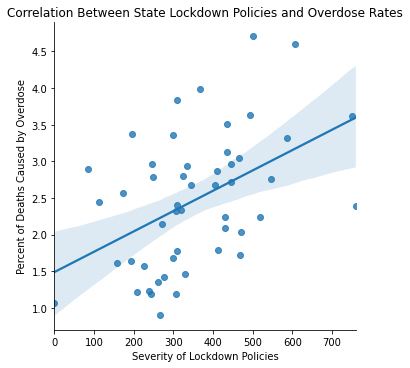

In [59]:
ax = sns.lmplot(x='score',y='ave',data=iso_cor)
ax.set(xlabel='Severity of Lockdown Policies', ylabel='Percent of Deaths Caused by Overdose', title='Correlation Between State Lockdown Policies and Overdose Rates')


In [60]:
iso_cor.corr()**2

,score,ave
score,1.0000,0.2143
ave,0.2143,1.0000


In [ ]:
cols = ['score','Post']
comp_df = no_increase_df[cols]
comp_df.corr()**2

In [63]:
iso_cor.sort_values(by='score',ascending = False)

,POSTCODE,score,ave
21,MI,760.0,2.394494
29,NJ,750.0,3.619622
19,MD,606.0,4.606691
37,PA,587.0,3.320989
12,IL,547.0,2.755670
46,WA,519.0,2.246415
7,DE,500.0,4.706436
20,MA,492.0,3.626590
10,HI,471.0,2.034484
36,OR,467.0,1.718489
